<a href="https://colab.research.google.com/github/gabrielasarria/Lina-Flor/blob/main/semana3/Lina_Flor_RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Taller Bosques Aleatorios

Usando el dataset heart.csv desarrollar un sistema de predicción que permita determinar si un paciente tiene una enfermedad cardíaca.

El data set tiene las siguientes variables independientes:

* age (edad)
* sex (sexo)
* chest pain type (tipo de dolor en el pecho)
* resting blood pressure (presión arterial en reposo)
* serum cholestoral in mg/dl (colesterol)
* fasting blood sugar > 120 mg/dl (nivel de azucar en sangre en ayunas)
* resting electrocardiographic results (values 0,1,2) (electrocardiograma en reposo)
* maximum heart rate achieved (frecuencia cardíaca máxima)
* exercise induced angina (angina provocada por ejercicio)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment (depresión del ST inducida por el ejercicio respecto al reposo)
* number of major vessels (0-3) colored by flourosopy (número de vasos principales coloreados)
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (talasemia detectada)

La variable dependiente o target es:

* Enfermedad cardíaca (valor = 0 NO, valor = 1 SI)

Realizar el ajuste del modelo, usando el 80% de los datos en el entrenamiento y el 20% para test, además obtener el accuracy general del sistema de predicción.

Guarde el modelo con extensión .h5

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline

In [2]:
dfdata = pd. read_csv("/content/heart.csv")
dfdata.head ( )

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
dfdata.count()

,0
age,1025
sex,1025
cp,1025
trestbps,1025
chol,1025
fbs,1025
restecg,1025
thalach,1025
exang,1025
oldpeak,1025


In [4]:
labels = ['age','sex','chest pain type','resting blood pressure'
         ,'serum cholestoral in mg/dl ','fasting blood sugar > 120 mg/dl ','resting electrocardiographic results ','maximum heart rate achieved'
          ,'exercise induced angina','oldpeak ','the slope of the peak exercise ST segmen','number of major vessels']

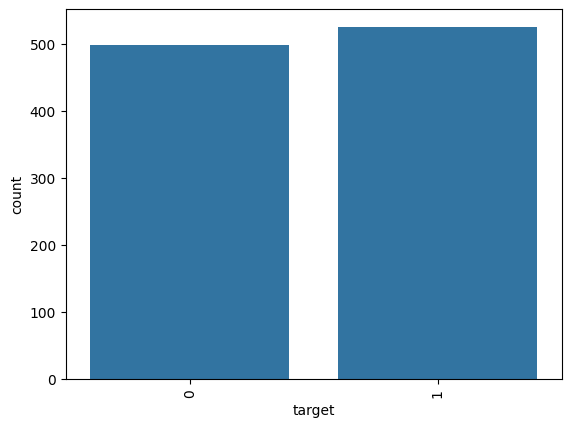

In [5]:
sns.countplot(x='target',data=dfdata)
plt.xticks(x=dfdata['target'], rotation='vertical')
plt.show()

In [8]:
dfdata[dfdata['target'] == 1].count()

,0
age,526
sex,526
cp,526
trestbps,526
chol,526
fbs,526
restecg,526
thalach,526
exang,526
oldpeak,526


In [9]:
dfdata[dfdata['target'] == 0].count()

,0
age,499
sex,499
cp,499
trestbps,499
chol,499
fbs,499
restecg,499
thalach,499
exang,499
oldpeak,499


diferencia de solo 27 registros

In [13]:
from sklearn.utils import resample

dfdata2 = pd.DataFrame()
for i in range(2):
  df_aux = dfdata[dfdata.target == i]
  df_aux = resample(df_aux, n_samples=499, random_state=2)
  dfdata2 = pd.concat([dfdata2, df_aux])

dfdata2.target.value_counts()

,count
target,
0,499
1,499


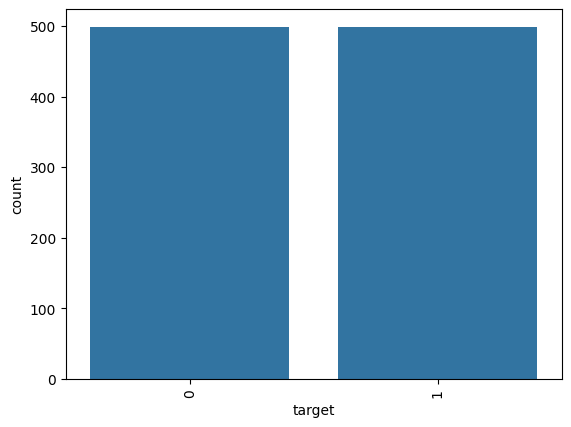

In [14]:
sns.countplot(x='target',data=dfdata2)
plt.xticks(x=dfdata2['target'], rotation='vertical')
plt.show()

In [15]:
dfdata2.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
364,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0


In [16]:
x= dfdata2.drop(['target'], axis=1)
y = dfdata2['target']

x = np.array(x)
y = np.array(y)

print (x.shape)
print (y.shape)

(998, 13)
(998,)


In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

print (xtrain.shape)
print (ytrain.shape)
print (ytest.shape)
print (xtest.shape)

(798, 13)
(798,)
(200,)
(200, 13)


In [18]:
ytest

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.asarray(ytrain).reshape(-1,1))
y_train = enc.transform(np.asarray(ytrain).reshape(-1,1)).toarray()
y_test = enc.transform(np.asarray(ytest).reshape(-1,1)).toarray()

y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256,input_shape = (xtrain.shape[1],), activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))


model.add(Dense(2,activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,738 (510.70 KB)

 Trainable params: 130,738 (510.70 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(xtrain, y_train, epochs=15, batch_size=32,verbose=1, validation_split=0.1)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.6747 - loss: 0.5945 - val_accuracy: 0.7125 - val_loss: 0.6108
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7052 - loss: 0.5722 - val_accuracy: 0.7000 - val_loss: 0.5923
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6887 - loss: 0.5889 - val_accuracy: 0.7000 - val_loss: 0.5896
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6874 - loss: 0.5568 - val_accuracy: 0.7250 - val_loss: 0.5884
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7094 - loss: 0.5606 - val_accuracy: 0.6625 - val_loss: 0.6329
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7123 - loss: 0.5677 - val_accuracy: 0.7625 - val_loss: 0.5414
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7053 - loss: 0.5652 - val_accuracy: 0.7625 - val_loss: 0.5596
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7383 - loss: 0.5357 - val_accuracy: 0.7375 - val_los

In [23]:
model.save('RedesNt.h5')

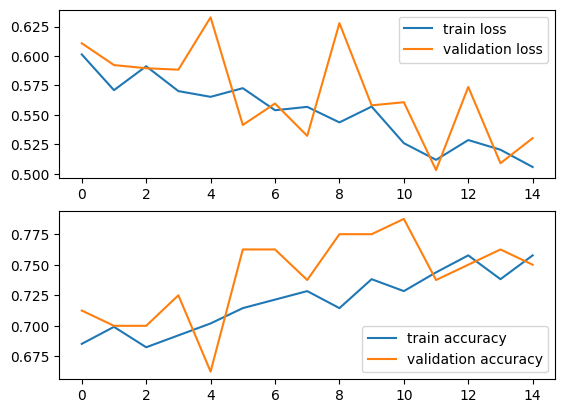

In [27]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'validation loss'])

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy', 'validation accuracy'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0     0.7889    0.7553    0.7717        94
           1     0.7909    0.8208    0.8056       106

    accuracy                         0.7900       200
   macro avg     0.7899    0.7880    0.7886       200
weighted avg     0.7900    0.7900    0.7897       200



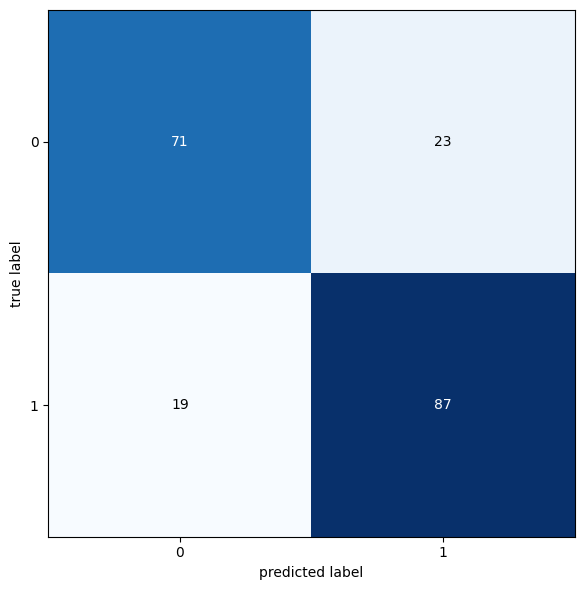

In [28]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = model.predict(xtest)
matriz = confusion_matrix(ytest, np.argmax(y_pred, axis=1))

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed= False)
plt.tight_layout()


print(metrics.classification_report(ytest, np.argmax(y_pred, axis=1), digits= 4))